# IMPORT DEPENDENCIES

In [69]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.animation as animation

from matplotlib.colors import ListedColormap

from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

In [70]:
# Loadin the Dataset

In [71]:
df = pd.read_csv(r'C:\Users\NIDHAL\Desktop\Lung Cancer\cancer patient data sets.csv')
display(df[0:5].T)
df

,0,1,2,3,4
index,0,1,2,3,4
Patient Id,P1,P10,P100,P1000,P101
Age,33,17,35,37,46
Gender,1,1,1,1,1
Air Pollution,2,3,4,7,6
Alcohol use,4,1,5,7,8
Dust Allergy,5,5,6,7,7
OccuPational Hazards,4,3,5,7,7
Genetic Risk,3,4,5,6,7
chronic Lung Disease,2,2,4,7,6


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [72]:
# Show DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [73]:
# Get the mean, min, max, and standard deviation of each column
# Describe DataFrame
round(df.describe().iloc[1:, ].T, 1)


,mean,std,min,25%,50%,75%,max
index,499.5,288.8,0.0,249.8,499.5,749.2,999.0
Age,37.2,12.0,14.0,27.8,36.0,45.0,73.0
Gender,1.4,0.5,1.0,1.0,1.0,2.0,2.0
Air Pollution,3.8,2.0,1.0,2.0,3.0,6.0,8.0
Alcohol use,4.6,2.6,1.0,2.0,5.0,7.0,8.0
Dust Allergy,5.2,2.0,1.0,4.0,6.0,7.0,8.0
OccuPational Hazards,4.8,2.1,1.0,3.0,5.0,7.0,8.0
Genetic Risk,4.6,2.1,1.0,2.0,5.0,7.0,7.0
chronic Lung Disease,4.4,1.8,1.0,3.0,4.0,6.0,7.0
Balanced Diet,4.5,2.1,1.0,2.0,4.0,7.0,7.0


In [74]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [75]:
df.shape

(1000, 26)

# cleaning and exploring data

In [76]:
# Check for missing values in each column
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [77]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)

In [78]:
df.head

<bound method NDFrame.head of      index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     Occu

In [79]:
null_percent_df = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
null_percent_df.columns=['column_name', 'per_of_null_values']
null_percent_df

,column_name,per_of_null_values
0,index,0.0
1,Patient Id,0.0
2,Age,0.0
3,Gender,0.0
4,Air Pollution,0.0
5,Alcohol use,0.0
6,Dust Allergy,0.0
7,OccuPational Hazards,0.0
8,Genetic Risk,0.0
9,chronic Lung Disease,0.0


In [80]:
# Drop the Patient ID column and the ID  column will take over.
df.drop("Patient Id", axis=1, inplace=True)


In [81]:
# Cleaning Column Names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)
df = df.rename(columns={'index': 'patient'})

In [82]:
df["gender"] = df["gender"].replace([1,2],["female","male"])

In [83]:
df

,patient,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,smoking,passive_smoker,chest_pain,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,0,33,female,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,17,female,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,35,female,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,37,female,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,46,female,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,female,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,High
996,996,37,male,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4,High
997,997,25,male,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
998,998,18,male,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [84]:
# gets a list of unique values in the 'level' column of the DataFrame and stores it in the list 'list1'.
list1=df['level'].unique().tolist()
print(list1)
# Next, it creates a new list called 'cancer_level' that contains the strings 'Low', 'Medium', and 'High'.
cancer_level=['Low','Medium','High']
print(cancer_level)
M=list(range(len(cancer_level)))
# The 'normal_mapping' dictionary maps the elements in 'cancer_level' to the corresponding elements in 'M'
normal_mapping=dict(zip(cancer_level,M)) 
# the 'reverse_mapping' dictionary does the opposite, mapping the elements in 'M' to the corresponding elements in 'cancer_level'.
reverse_mapping=dict(zip(M,cancer_level))
# Finally, it replaces the values in the 'level' column of 'df1'
# with their corresponding values in 'cancer_level', using the 'map()' function. 
df1=df.copy()
df1['level']=df1['level'].map(normal_mapping)
display(df1['level'])

['Low', 'Medium', 'High']
['Low', 'Medium', 'High']


0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: level, Length: 1000, dtype: int64

In [85]:
data=df.corr()
data

,patient,age,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,smoking,passive_smoker,chest_pain,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
patient,1.000000,0.002674,0.053307,0.041374,0.037960,0.032355,0.030725,0.025177,0.030743,0.050584,0.018407,0.019517,0.022210,0.049401,0.042346,0.026393,0.027950,0.015078,0.005573,0.015706,0.045687,0.003793,-0.002957
age,0.002674,1.000000,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,0.075333,0.004908,0.012864,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
air_pollution,0.053307,0.099494,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,0.481902,0.606764,0.585734,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
alcohol_use,0.041374,0.151742,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,0.547035,0.592576,0.717242,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
dust_allergy,0.037960,0.035202,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,0.358691,0.560002,0.639983,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
occupational_hazards,0.032355,0.062177,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,0.497693,0.555311,0.775619,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
genetic_risk,0.030725,0.073151,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,0.543259,0.609071,0.831751,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic_lung_disease,0.025177,0.128952,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,0.578585,0.572698,0.782646,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
balanced_diet,0.030743,0.004863,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,0.645390,0.725123,0.798207,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
obesity,0.050584,0.034337,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,0.486795,0.681889,0.673150,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


<AxesSubplot:>

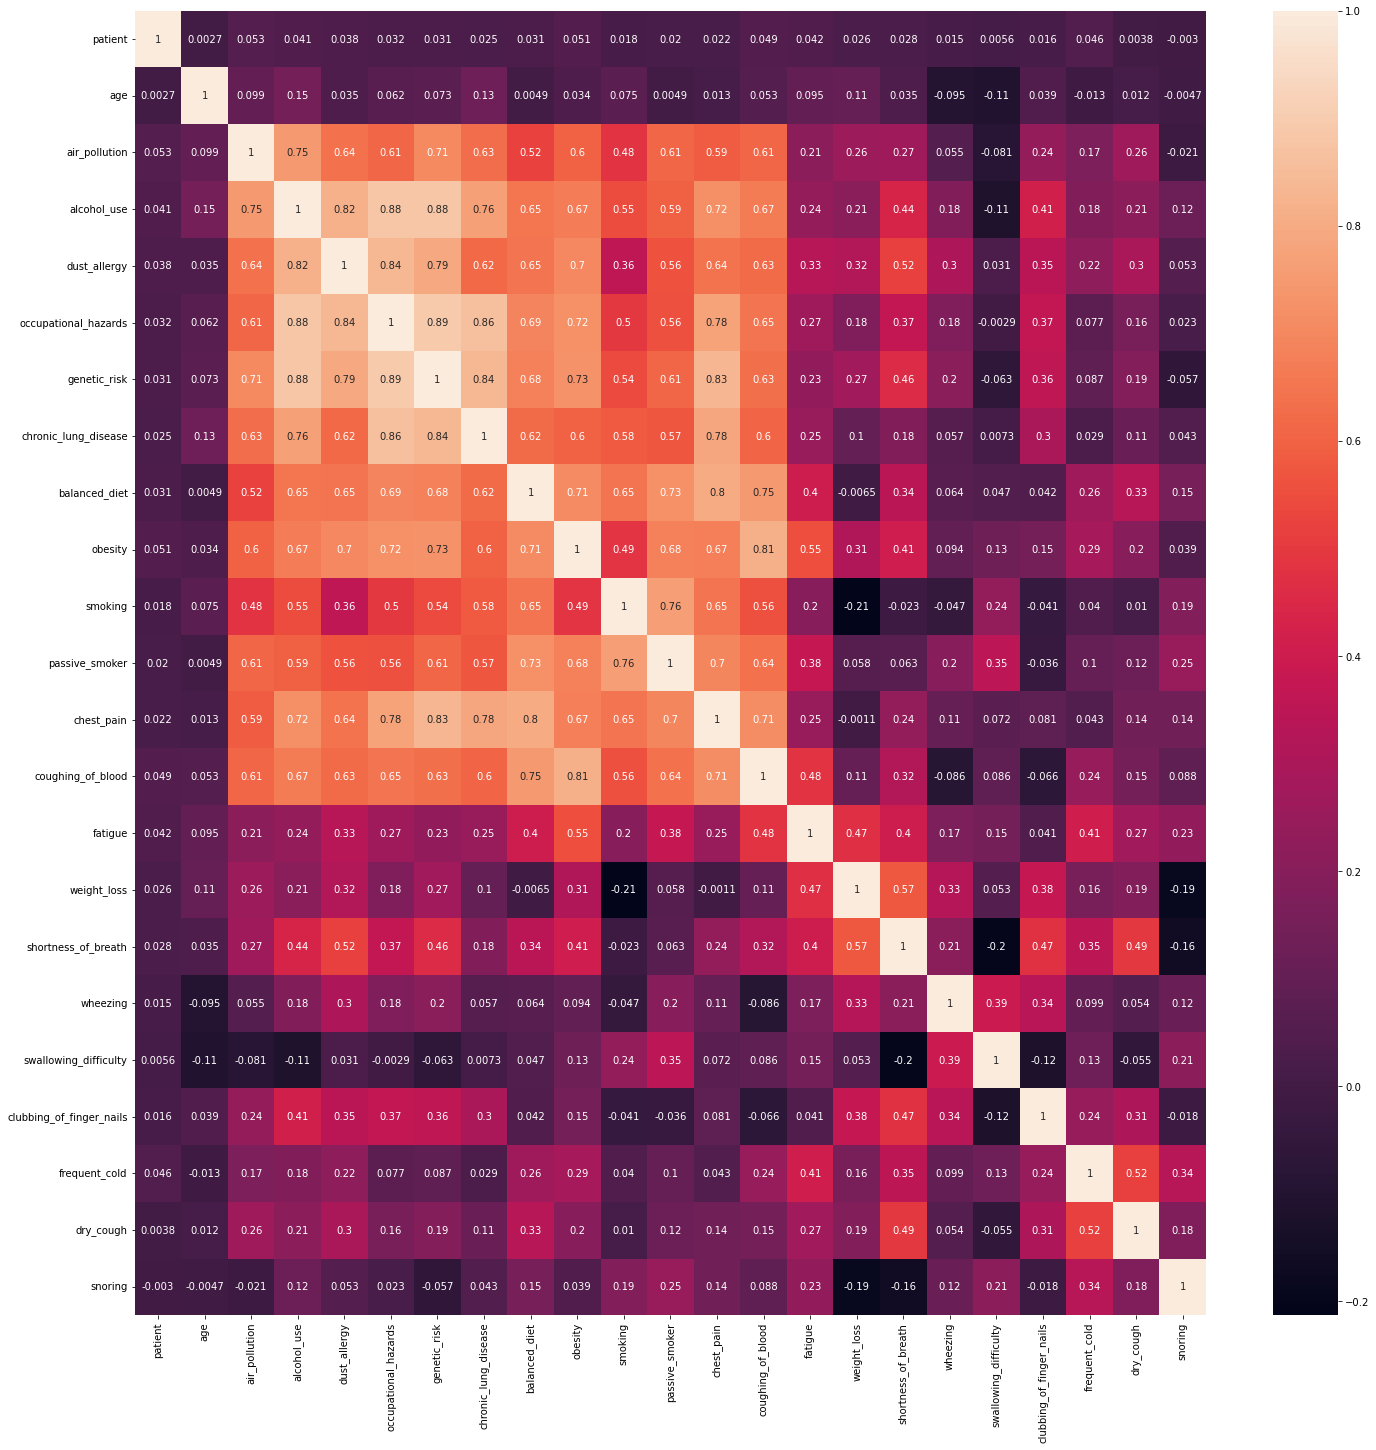

In [86]:
plt.subplots(figsize = (24, 24))
sns.heatmap(df.corr(), annot = True)

In [87]:
def find_highly_correlated_columns(df, threshold=0.8):
    # Calculate the correlations between all pairs of columns
    correlations = df.corr().abs()

    # Create a mask to only select the upper triangle of the matrix
    mask = np.triu(np.ones_like(correlations, dtype=bool))

    # Find the columns that are highly correlated with each other
    highly_correlated = correlations.where(mask).stack().sort_values(ascending=False)

    # Select the pairs of columns that have a correlation coefficient greater than the threshold
    highly_correlated = highly_correlated[highly_correlated >= threshold]

    # Convert the index to a list of tuples
    highly_correlated = [(x[0], x[1]) for x in highly_correlated.index]


    return highly_correlated

# Find the pairs of columns that have a correlation coefficient greater than 0.8
highly_correlated_columns = find_highly_correlated_columns(df)

# Print the pairs of columns
for pair in highly_correlated_columns:
    print(f'Columns {pair[0]} and {pair[1]} are highly correlated')


Columns patient and patient are highly correlated
Columns age and age are highly correlated
Columns alcohol_use and alcohol_use are highly correlated
Columns dust_allergy and dust_allergy are highly correlated
Columns occupational_hazards and occupational_hazards are highly correlated
Columns genetic_risk and genetic_risk are highly correlated
Columns chronic_lung_disease and chronic_lung_disease are highly correlated
Columns balanced_diet and balanced_diet are highly correlated
Columns obesity and obesity are highly correlated
Columns smoking and smoking are highly correlated
Columns passive_smoker and passive_smoker are highly correlated
Columns chest_pain and chest_pain are highly correlated
Columns coughing_of_blood and coughing_of_blood are highly correlated
Columns fatigue and fatigue are highly correlated
Columns weight_loss and weight_loss are highly correlated
Columns shortness_of_breath and shortness_of_breath are highly correlated
Columns wheezing and wheezing are highly cor

In [88]:
# # giving labels to our values
values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
labels = ['extremely low', 'very low', 'low', 'below average', 'average', 'slightly above average', 'high', 'very high', 'extremely high', 'TOP']

labeled_values = list(zip(labels, values))

print(labeled_values)

[('extremely low', 0), ('very low', 1), ('low', 2), ('below average', 3), ('average', 4), ('slightly above average', 5), ('high', 6), ('very high', 7), ('extremely high', 8), ('TOP', 9)]


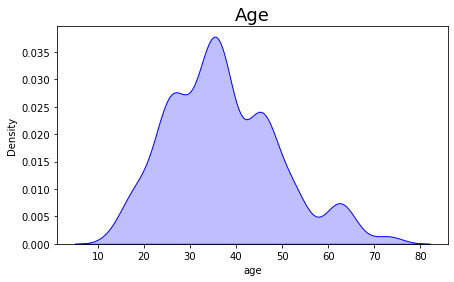

In [89]:
# What is the distribution of the Age among the patients?
plt.figure(figsize = (7,4))
sns.kdeplot(df.age, shade = True, color = "b")
plt.title("Age", fontsize = 18)
plt.show()

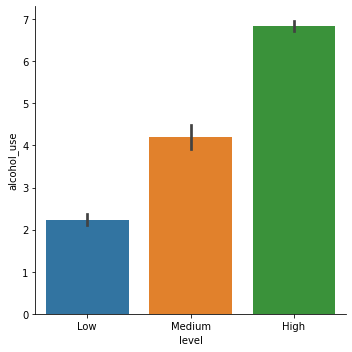

In [90]:
# Create a bar plot of the 'cancer level' in relationship to the 'alcohol use'.
sns.catplot(x='level', y='alcohol_use', kind='bar', data=df)
# The relationship between alcohol use and cancer risk is strong-dependent, 
#meaning that the more alcohol a person consumes, the greater their risk of developing cancer. 
#From a Scientific perspective The cancer-causing agents present in alcohol, such as acetaldehyde, 
#can damage the DNA in cells, leading to mutations and cancer development.

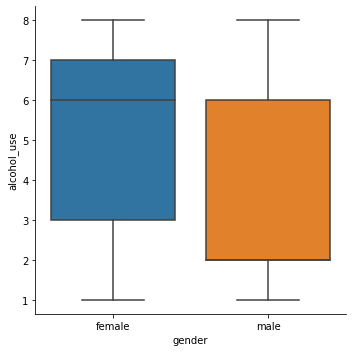

In [91]:
# Create a box plot of the 'gender' vis a vis the 'alcohol use'.
sns.catplot(x='gender', y='alcohol_use', kind='box', data=df)

<AxesSubplot:xlabel='level', ylabel='smoking'>

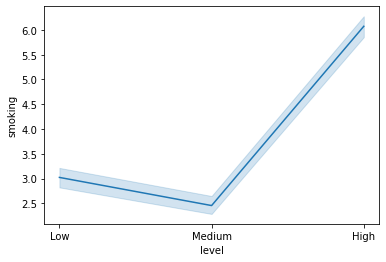

In [92]:
# Create a line plot
sns.lineplot(x='level', y='smoking', data=df)

<AxesSubplot:title={'center':'Level Column Values'}, ylabel='level'>

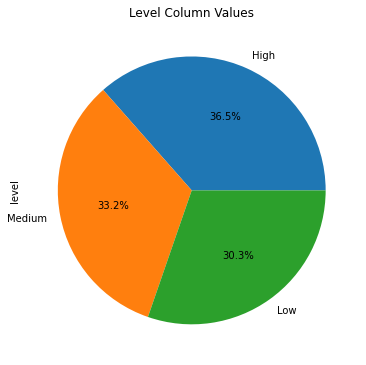

In [93]:
# What is the distribution of the Lung cancer level among the patients?
plt.figure(figsize=(6,7))
plt.title("Level Column Values")
round(df["level"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [94]:
# How does the prevalence of different risk factors (e.g., air pollution exposure, alcohol use, smoking, etc.) vary among the patients?

# Select the risk factor columns
risk_factors = ['air_pollution', 'alcohol_use', 'smoking', 'passive_smoker']

# Calculate the percentage of patients with each risk factor
risk_factor_prevalence = df[risk_factors].mean() * 100

print(risk_factor_prevalence)


air_pollution     384.0
alcohol_use       456.3
smoking           394.8
passive_smoker    419.5
dtype: float64


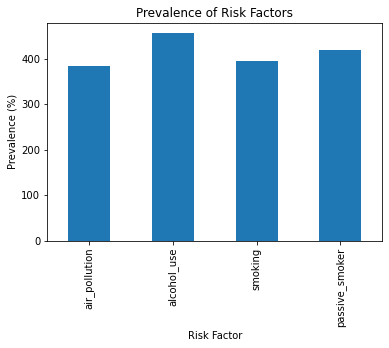

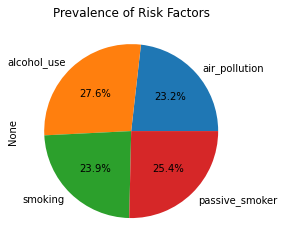

In [95]:
# Create a bar chart
risk_factor_prevalence.plot(kind='bar')
plt.xlabel('Risk Factor')
plt.ylabel('Prevalence (%)')
plt.title('Prevalence of Risk Factors')
plt.show()

# Create a pie chart
risk_factor_prevalence.plot(kind='pie', autopct='%1.1f%%')
plt.title('Prevalence of Risk Factors')
plt.show()


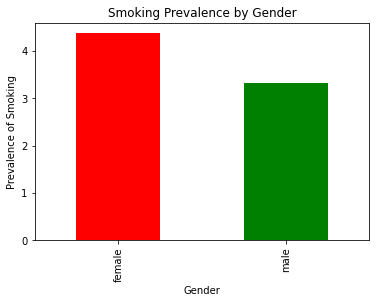

In [96]:
df_by_gender = df.groupby('gender')
smoking_prevalence_by_gender = df_by_gender['smoking'].mean()
smoking_prevalence_by_gender.plot.bar(color=['r','g'])
plt.title('Smoking Prevalence by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalence of Smoking')
plt.show()


<AxesSubplot:xlabel='chronic_lung_disease', ylabel='count'>

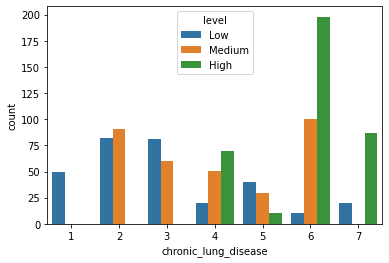

In [97]:
# Are there any particular combinations of symptoms that seem to be particularly indicative of lung cancer?
sns.countplot(x='chronic_lung_disease', hue='level', data=df)



In [98]:
def update_plot(num, df, scat):
    scat.set_offsets(df.iloc[:num, :])
    return scat,


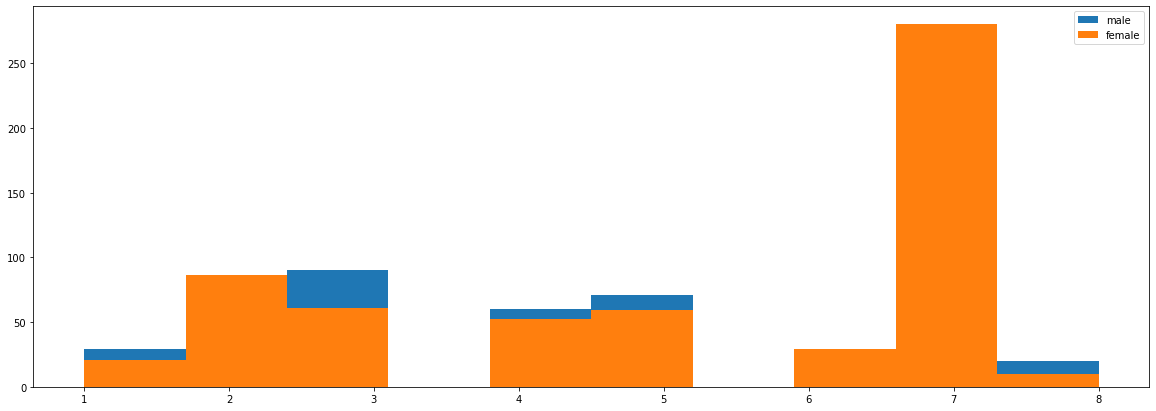

In [99]:
fig, ax = plt.subplots(figsize=(20, 7))

ax.hist(df[df['gender'] == 'male']['occupational_hazards'], label='male')
ax.hist(df[df['gender'] == 'female']['occupational_hazards'], label='female')

ax.legend()
plt.show()
ax.set(title='Relation Between OccuPational Hazards and Gender')
plt.show()


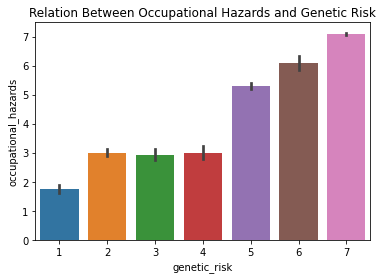

In [100]:
x = 'genetic_risk'
y = 'occupational_hazards'

# Create a bar plot with the gender as the x variable
sns.barplot(x=x, y=y, data=df)

# Add a title
plt.title('Relation Between Occupational Hazards and Genetic Risk')

# Show the plot
plt.show()
# The relationship between occupational hazards and genetic risk is an area of ongoing research.
# Some studies have suggested that certain genetic risks may increase an individual's susceptibility 
#to certain types of occupational hazards,certain genetic variations have been associated with an increased risk of developing 
#certain types of cancer, such as lung cancer, as a result of exposure to certain occupational hazards, 
#such as secondhand smoke and certain chemicals.

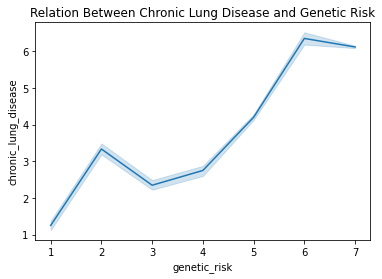

In [101]:
# Select the columns to use as the x and y variables
x = 'genetic_risk'
y = 'chronic_lung_disease'

# Create a line plot with the occupational hazards as the x variable
sns.lineplot(x=x, y=y, data=df)

# Add a title
plt.title('Relation Between Chronic Lung Disease and Genetic Risk')

# Show the plot
plt.show()
# We Notice that  genetic risk may increase an individual's susceptibility to certain types of chronic lung diseases.

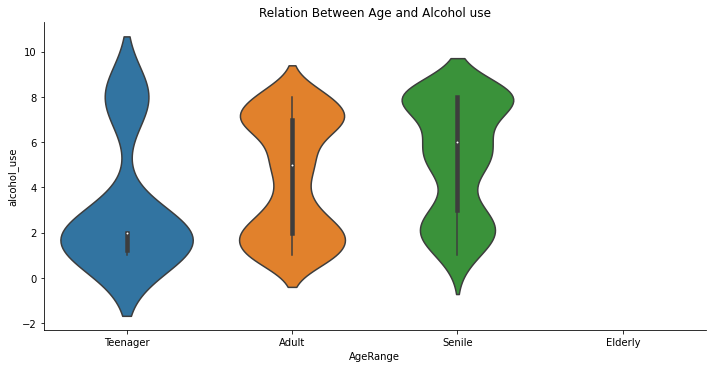

In [102]:
df['AgeRange'] = pd.cut(df['age'], bins=[14, 18, 45, 74, 100], labels=['Teenager', 'Adult', 'Senile', 'Elderly'])
sns.catplot(data=df, x="AgeRange", y="alcohol_use", kind="violin", aspect=20/10, height=5).set(title='Relation Between Age and Alcohol use')
# In terms of overall alcohol consumption,young and adults people tend to drink more often than older peeps, 
#but when they do drink, adults  tend to consume more alcohol.
#In terms of overall alcohol consumption, prevalence of alcohol use tend to decline with increasing age

<AxesSubplot:title={'center':'Relation between Obesity and Coughing of Blood'}, xlabel='obesity', ylabel='coughing_of_blood'>

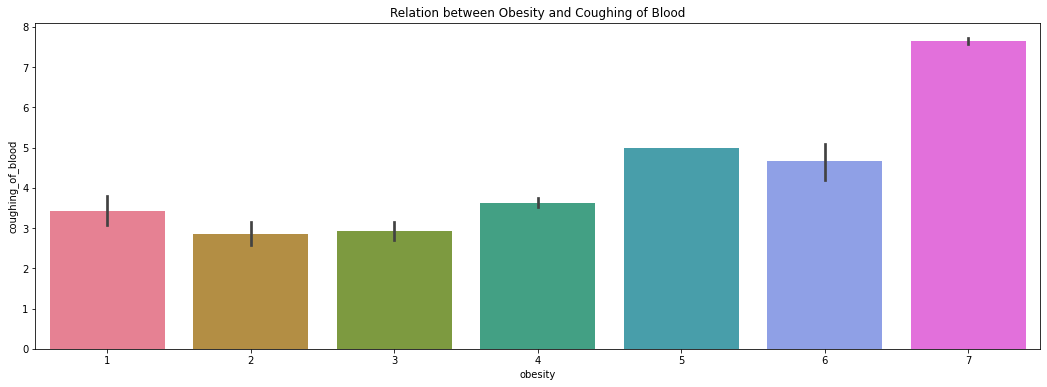

In [103]:
plt.figure(figsize=(18, 6))
plt.title("Relation between Obesity and Coughing of Blood")
sns.barplot(data=df, x="obesity", y="coughing_of_blood",palette="husl")
# Obesity and coughing up blood (hemoptysis) are separate conditions, 
#but research suggests that there may be a link between the two.
#that made me to investigate more this matter as we notice that coughind of blood increases as the the obesity get worse
#Obesity-associated lung diseases such as asthma, chronic obstructive pulmonary disease (COPD) and 
#sleep apnea are known to cause a persistent cough, 
#and can lead to the development of bronchitis or emphysema which can increase the risk of hemoptysis.
# Similarly, increased pressure on the chest caused by obesity can also cause the blood vessels in the lungs to rupture, 
#leading to hemoptysis.

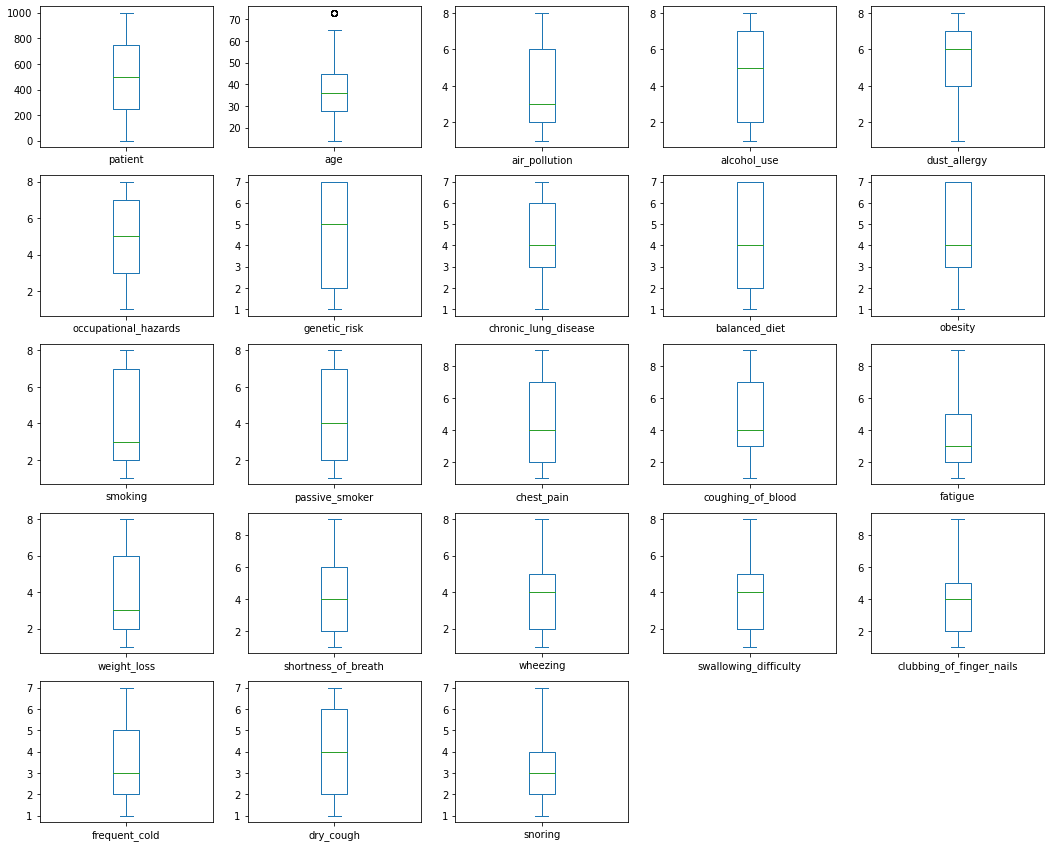

In [104]:
# drawing a box plots for all columns

df.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()



In [105]:
from scipy.stats import chi2_contingency

# Create a contingency table of the two variables
contingency_table = pd.crosstab(df['swallowing_difficulty'], df['snoring'])

# Calculate the chi-squared statistic and p-value
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(p)
#This test is used to determine if there is a significant association between the two variables.
# A p-value of 0 means that there is a very strong association between the two variables.  
#This indicates that the probability of observing this association by chance is extremely small.

0.0


In [106]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df['age'].between(lower_bound, upper_bound, inclusive=False)
df_clean = df.loc[outliers]
df['Outlier'] = np.where(outliers, 'No', 'Yes')


<AxesSubplot:title={'center':'Age Column Box Plot'}, xlabel='age'>

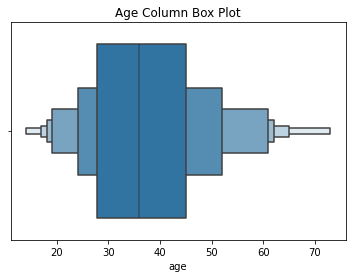

In [107]:
plt.title("Age Column Box Plot")
sns.boxenplot(df.age)

In [108]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Convert the string values to numerical values
df['level'] = encoder.fit_transform(df['level'])
df['patient'] = encoder.fit_transform(df['patient'])

# Convert the string values to numerical values
df = df.apply(encoder.fit_transform)


In [109]:
# Setting Target
y = df['level']
X = df.drop(columns='level')

display(X.head(), y.head(10))

,patient,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,smoking,passive_smoker,chest_pain,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,AgeRange,Outlier
0,0,14,0,1,3,4,3,2,1,1,3,2,1,1,3,2,3,1,1,2,0,1,2,3,0,0
1,1,1,0,2,0,4,2,3,1,1,1,1,3,1,2,0,2,6,7,5,1,0,6,1,2,0
2,2,16,0,3,4,5,4,4,3,5,6,1,2,3,7,6,6,7,1,0,3,5,6,1,0,0
3,3,18,0,6,6,6,6,5,6,6,6,6,6,6,7,3,1,2,0,3,4,5,6,4,0,0
4,4,25,0,5,7,6,6,6,5,6,6,7,6,6,8,2,1,3,0,3,1,3,1,2,1,0


0    1
1    2
2    0
3    0
4    0
5    0
6    1
7    1
8    2
9    2
Name: level, dtype: int64

In [110]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)
print(f'X train shape: {X_train.shape}')
print(f'Y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'Y test shape: {y_test.shape}')

X train shape: (700, 26)
Y train shape: (700,)
X test shape: (300, 26)
Y test shape: (300,)


In [111]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [132]:
# Create a list of feature names
feature_names = ['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy', 'occupational_hazards', 'genetic_risk', 'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath', 'wheezing', 'swallowing_difficulty', 'clubbing_of finger_nails', 'snoring']


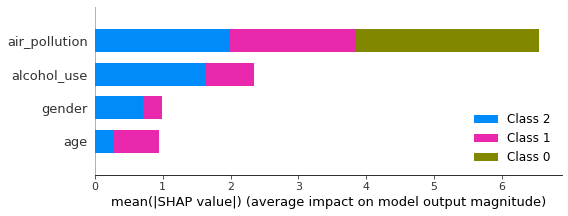

In [133]:
# Next, import the necessary libraries
import shap
import xgboost

# Load your dataset and split it into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a model on the training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Display the top 10 features, ranked by their SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names, max_display=10)
#SHAP values are a measure of how much each feature contributes to the model's predictions. 
#A higher SHAP value indicates that a feature has a more significant impact on the model's output. 
#By plotting the SHAP values, you can get a better understanding of which features are most important in determining the model's predictions.

In [114]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with the model and a StandardScaler
model = make_pipeline(StandardScaler(), LogisticRegression())

# Fit the pipeline to the training data
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [115]:
# Make predictions on the train data
y_train_pred = model.predict(X_train)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy of the model on the train data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the precision of the model on the train data
train_precision = precision_score(y_train, y_train_pred, average='macro')

# Calculate the recall of the model on the train data
train_recall = recall_score(y_train, y_train_pred, average='macro')

# Calculate the f1 score of the model on the train data
train_f1 = f1_score(y_train, y_train_pred, average='macro')

# Print the scores
print(f'Train Accuracy: {train_accuracy:.4%}')
print(f'Train Precision: {train_precision:.4%}')
print(f'Train Recall: {train_recall:.4%}')
print(f'Train F1 Score: {train_f1:.4%}')

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate the precision of the model on the test data
test_precision = precision_score(y_test, y_test_pred, average='macro')

# Calculate the recall of the model on the test data
test_recall = recall_score(y_test, y_test_pred, average='macro')

# Calculate the f1 score of the model on the test data
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Print the scores
print(f'\nTest Accuracy: {test_accuracy:.4%}')
print(f'Test Precision: {test_precision:.4%}')
print(f'Test Recall: {test_recall:.4%}')
print(f'Test F1 Score: {test_f1:.4%}')


Train Accuracy: 100.0000%
Train Precision: 100.0000%
Train Recall: 100.0000%
Train F1 Score: 100.0000%

Test Accuracy: 100.0000%
Test Precision: 100.0000%
Test Recall: 100.0000%
Test F1 Score: 100.0000%


In [116]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(accuracy)

from sklearn.metrics import recall_score

# Calculate the recall using the 'macro' average
recall = recall_score(y_test, y_pred, average='macro')

# Print the recall
print(recall)
from sklearn.metrics import f1_score

# Calculate the F1 score using the 'macro' average
f1 = f1_score(y_test, y_pred, average='macro')

# Print the F1 score
print(f1)


1.0
1.0
1.0


In [118]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(accuracy)

from sklearn.metrics import recall_score

# Calculate the recall using the 'macro' average
recall = recall_score(y_test, y_pred, average='macro')

# Print the recall
print(recall)
from sklearn.metrics import f1_score

# Calculate the F1 score using the 'macro' average
f1 = f1_score(y_test, y_pred, average='macro')

# Print the F1 score
print(f1)

1.0
1.0
1.0


In [119]:
from sklearn.svm import SVC

# Create an SVM classifier
clf = SVC()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(accuracy)

from sklearn.metrics import recall_score

# Calculate the recall using the 'macro' average
recall = recall_score(y_test, y_pred, average='macro')

# Print the recall
print(recall)
from sklearn.metrics import f1_score

# Calculate the F1 score using the 'macro' average
f1 = f1_score(y_test, y_pred, average='macro')

# Print the F1 score
print(f1)

0.315
0.3333333333333333
0.1596958174904943


In [120]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=10)

# Make predictions on the test data
y_pred = model.predict(X_test)


Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.3187
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: -0.5136 - accuracy: 0.3663
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: -0.5051 - accuracy: 0.3738
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: -2.0353 - accuracy: 0.3900
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: -2.5847 - accuracy: 0.3550
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: -5.7353 - accuracy: 0.4175
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: -8.2349 - accuracy: 0.3575
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: -14.0257 - accuracy: 0.4150
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: -21.4927 - accuracy: 0.3887
Epoch 10/10
7/7 [==============================] - 0s 2ms/step


In [121]:
!pip install shap

In [122]:
pip install xgboost

In [123]:
from sklearn.decomposition import PCA

# Create a PCA object with 3 components
pca = PCA(n_components=3)

# Fit the PCA object to the data and transform the data
X_pca = pca.fit_transform(X)


In [124]:
from sklearn.cluster import KMeans

# Create a k-means object with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the k-means object to the data
kmeans.fit(X_pca)

# Predict the clusters for each data point
clusters = kmeans.predict(X_pca)
print(clusters)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

2023-01-14 10:33:17.598 WARNING matplotlib.legend: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


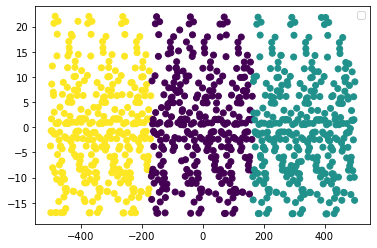

In [125]:
import matplotlib.pyplot as plt

# Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [126]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

2023-01-14 10:33:19.477 WARNING matplotlib.legend: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


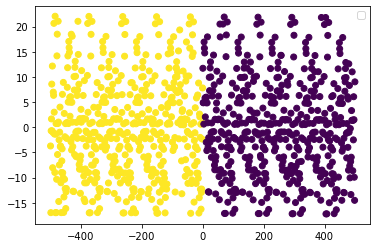

In [127]:
# Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)

# Add a legend
plt.legend()

# Show the plot
plt.show()


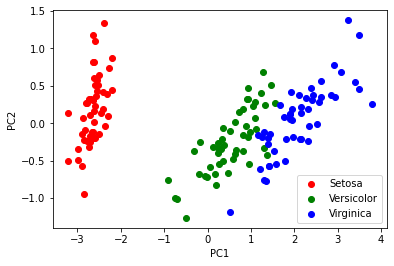

In [128]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Visualize the data with different colors for each category
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='r', label='Setosa')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='g', label='Versicolor')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], color='b', label='Virginica')

# Add labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [129]:
!pip install streamlit
!pip install torch
!pip install joblib


In [136]:
import streamlit as st
from joblib import dump, load
import torch

In [137]:
import joblib
from sklearn.linear_model import LogisticRegression



# Save the trained model to a file
joblib.dump(model, 'trained_model.pkl')

# Load the trained model from a file
model = joblib.load('trained_model.pkl')

# Use the model to make predictions
predictions = model.predict(X_test)


In [138]:
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('trained_model.pkl')

def predict_lung_cancer(age, gender, smoking, alcohol_use, occupational_hazards, chest_pain, snoring, chronic_lung_disease, obesity, coughing_of_blood, shortness_of_breath, wheezing, frequent_cold):
    """Takes user input and returns a prediction of lung cancer risk."""
    # Prepare the input data as a numpy array
    input_data = [age, gender, smoking, alcohol_use, occupational_hazards, chest_pain, snoring, chronic_lung_disease, obesity, coughing_of_blood, shortness_of_breath, wheezing, frequent_cold]
    input_data = np.array(input_data).reshape(1, -1)
    # Make a prediction using the trained model
    prediction = model.predict(input_data)
    return prediction

def main():
    st.title("Lung Cancer Risk Prediction")
    age = st.number_input("Age")
    gender = st.selectbox("Gender", ["Male", "Female"])
    smoking_status = st.selectbox("Smoking Status", ["Never smoked", "Former smoker", "Current smoker"])
    alcohol_use = st.selectbox("Alcohol use", ["Never", "Occasionally", "Regularly"])
    occupational_hazards = st.selectbox("Occupational hazards", ["No", "Yes"])
    chest_pain = st.selectbox("Chest pain", ["No", "Yes"])
    snoring = st.selectbox("Snoring", ["No", "Yes"])
    chronic_lung_disease = st.selectbox("Chronic lung disease", ["No", "Yes"])
    obesity = st.selectbox("Obesity", ["No", "Yes"])
    coughing_of_blood = st.selectbox("Coughing of blood", ["No", "Yes"])
    shortness_of_breath = st.selectbox("Shortness of breath", ["No", "Yes"])
    wheezing = st.selectbox("Wheezing", ["No", "Yes"])
    frequent_cold = st.selectbox("Frequent cold", ["No", "Yes"])
    
    # Other input fields for other features

    if st.button("Predict"):
        result = predict_lung_cancer(age, gender, smoking_status, alcohol_use, occupational_hazards, chest_pain, snoring, chronic_lung_disease, obesity, coughing_of_blood, shortness_of_breath, wheezing, frequent_cold, ...)
        st.success("The predicted risk of lung cancer is: {}".format(result))
